In [88]:
import torch
from utils import *
from core import *

device = 'cuda'

In [89]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [90]:
A = torch.load('matrix_200/matrix_rot_5_new_f32.pt').to(torch.float32)

In [91]:
projections = torch.load('test_data/projections_scaled.pt')
recons = torch.load('test_data/recon_scaled.pt')
recons.shape, projections.shape

(torch.Size([179, 200, 200]), torch.Size([200, 200, 200]))

In [92]:
recons_filled = torch.zeros(200, 200, 200)
recons_filled.shape

torch.Size([200, 200, 200])

In [93]:
recons_filled[12:191, :, :] = recons

In [94]:
proj = torch.sparse.mm(A, recons_filled.flatten().view(-1, 1))
proj.shape

torch.Size([40000, 1])

In [95]:
img = proj.view(200, 200) * 100
img = torch.clip(img, min=10, max=17)

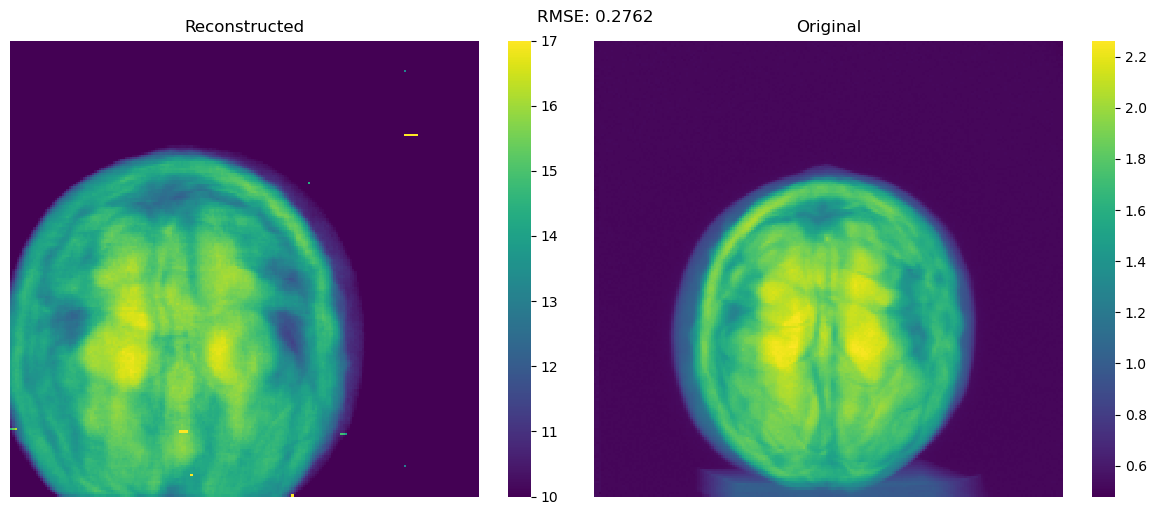

In [96]:
plot_2d_images(img.cpu(), projections[:, :, 5].cpu())